In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.*,
B.CL8AA1990 AS pop90,
B.CL8AA2000 AS pop00,
B.CL8AA2010 AS pop10,
C.metro_status,
C.economic_type_label,
D.gini_10, D.gini_00
FROM county_entropy_index AS A JOIN nhgis_pop_race_norm_90_10 AS B
ON A.GISJOIN = B.GISJOIN
JOIN usda_typology_2015 AS C ON B.STATEA || B.COUNTYA = C.fips
JOIN county_gini AS D ON A.GISJOIN = D.GISJOIN
;
'''
df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()
df.head()

,entropy_r_10,total_r_10,entropy_index_10,entropy_r_00,total_r_00,entropy_index_00,entropy_r_90,total_r_90,entropy_index_90,pop90,pop00,pop10,metro_status,economic_type_label,gini_10,gini_00
GISJOIN,,,,,,,,,,,,,,,,
G0100010,0.662470,54571,0.119872,0.594427,43672.89,0.191369,0.574266,34223.67,0.273471,34223.68,43672.90,54571,1,Nonspecialized,0.449228,0.435732
G0100030,0.583661,182265,0.142878,0.486592,140415.00,0.202772,0.493293,98280.00,0.285886,98280.00,140415.00,182265,1,Recreation,0.460482,0.440738
G0100050,0.903147,27457,0.139656,0.809245,29038.85,0.116351,0.735968,25417.62,0.144763,25417.62,29038.85,27457,0,Maufacturing,0.502484,0.508892
G0100070,0.648795,22915,0.166713,0.606501,20826.41,0.161091,0.545190,16610.89,0.109452,16610.89,20826.41,22915,1,Nonspecialized,0.452703,0.447818
G0100090,0.406089,57322,0.119005,0.317693,51028.62,0.148188,0.143022,39251.65,0.243028,39251.65,51028.61,57322,1,Nonspecialized,0.443153,0.434531


In [7]:
# calc pop change
df['ppctchg_0010'] = ( df['pop10'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

In [8]:
# calc diff in gini
df['gini_diff_0010'] = df['gini_10'] - df['gini_00']

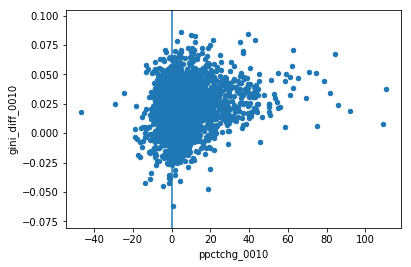

In [11]:
ax=df.plot.scatter('ppctchg_0010', 'gini_diff_0010')
ax.axvline(x=0)

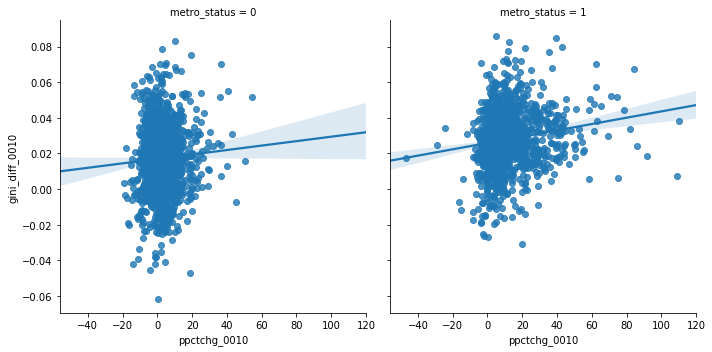

In [13]:
# separate metro status in plot of pop change against change in segregation
sns.lmplot('ppctchg_0010', 'gini_diff_0010', df, col='metro_status')

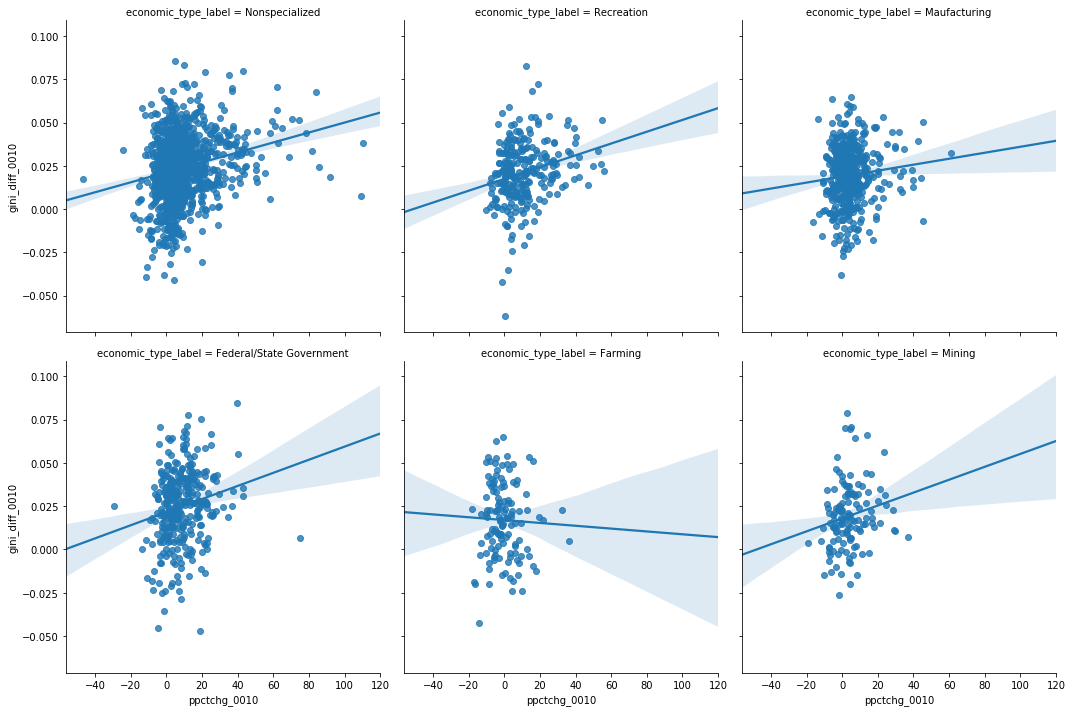

In [15]:
# separate metro status in plot of pop change against change in segregation
sns.lmplot('ppctchg_0010', 'gini_diff_0010', df, col='economic_type_label', col_wrap=3)